In [1]:
'''
房地产市场分析
'''
#导入库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置中文字体
plt.rcParams['axes.unicode_minus'] = False #正常显示负号


In [2]:
#导入数据
data = pd.read_csv('../data/house_sales.csv')


,city,address,area,floor,name,price,province,rooms,toward,unit,year,origin_url
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建,https://hf.esf.fang.com/chushou/3_404230646.htm
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建,https://hf.esf.fang.com/chushou/3_404304901.htm
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建,https://hf.esf.fang.com/chushou/3_404372096.htm


In [ ]:
#清洗数据
#去除'origin_url'列
data.drop(columns=['origin_url'],inplace=True)
#去除重复行
data.drop_duplicates(inplace=True)
#删除缺失值
data.dropna(inplace=True)
#数据类型转换
data['year'] = data['year'].str.replace('年建','')
data['area'] = data['area'].str.replace('㎡','').astype(float)
data['price'] = data['price'].str.replace('万','').astype(float)
data['unit'] = data['unit'].str.replace('元/㎡','').astype(float)
data['address'] = data['address'].str.split('-').str[0]
data['floor'] = data['floor'].str[:2].astype('category')
data['toward'] = data['toward'].astype('category')

#计算异常值 IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
#过滤异常值
data = data[(data['price'] >= Q1 - 1.5 * IQR) & (data['price'] <= Q3 + 1.5 * IQR)]


,city,address,area,floor,name,price,province,rooms,toward,unit,year
0,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
1,合肥,龙岗-临泉东路和王岗大道交叉口东南角,90㎡,中层（共18层）,圣地亚哥,128万,安徽,3室2厅,南北向,14222元/㎡,2013年建
2,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
3,合肥,生态公园-淮海大道与大众路交口,95㎡,中层（共18层）,正荣·悦都荟,132万,安徽,3室2厅,南向,13895元/㎡,2019年建
4,合肥,撮镇-文一名门金隅裕溪路与东风大道交口,37㎡,中层（共22层）,文一名门金隅,32万,安徽,2室1厅,南北向,8649元/㎡,2017年建


In [20]:
data.sample(5)


,city,address,area,floor,name,price,province,rooms,toward,unit,year
27398,雅安,雨城区,114.0,高层,正黄金域首府,105.0,四川,3室2厅,南北向,9211.0,2014
71816,罗源,南屿,89.1,高层,正荣·财富中心,200.0,福建,3室2厅,南向,22447.0,2014
14800,淄博,龙凤苑,170.0,低层,龙凤苑,179.0,山东,3室2厅,南北向,10529.0,2011
8486,洛阳,洛龙体育场,83.0,中层,盛唐至尊,107.0,河南,2室2厅,南向,12892.0,2012
20408,新安,龙门高铁站,106.0,高层,中油家园,126.0,河南,3室2厅,南北向,11887.0,2009


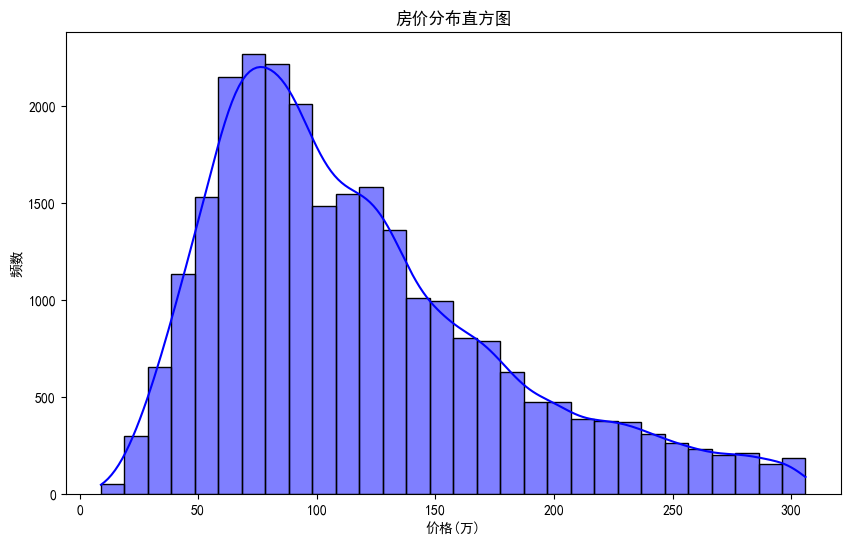

In [24]:
#数据可视化
#房价分布直方图
plt.figure(figsize=(10,6))
sns.histplot(data['price'],bins=30,kde=True,color='blue')
plt.title('房价分布直方图')
plt.xlabel('价格(万)')
plt.ylabel('频数')
plt.show()

# #价格与面积、楼层、朝向关系散点图
# plt.figure(figsize=(18,5))
# plt.subplot(1,3,1)
# sns.scatterplot(data=data,x='area',y='price',hue='floor')
# plt.title('价格与面积关系散点图')
# plt.xlabel('面积(㎡)')
# plt.ylabel('价格(万)')
# plt.subplot(1,3,2)
# sns.scatterplot(data=data,x='floor',y='price',hue='area')
# plt.title('价格与楼层关系散点图')
# plt.xlabel('楼层')
# plt.ylabel('价格(万)')
# plt.subplot(1,3,3)
# sns.scatterplot(data=data,x='toward',y='price',hue='area')
# plt.title('价格与朝向关系散点图')
# plt.xlabel('朝向')
# plt.ylabel('价格(万)')
# plt.show()

C:\Windows\Temp\ipykernel_29124\1084371303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x='toward',y='price',palette='Set3')


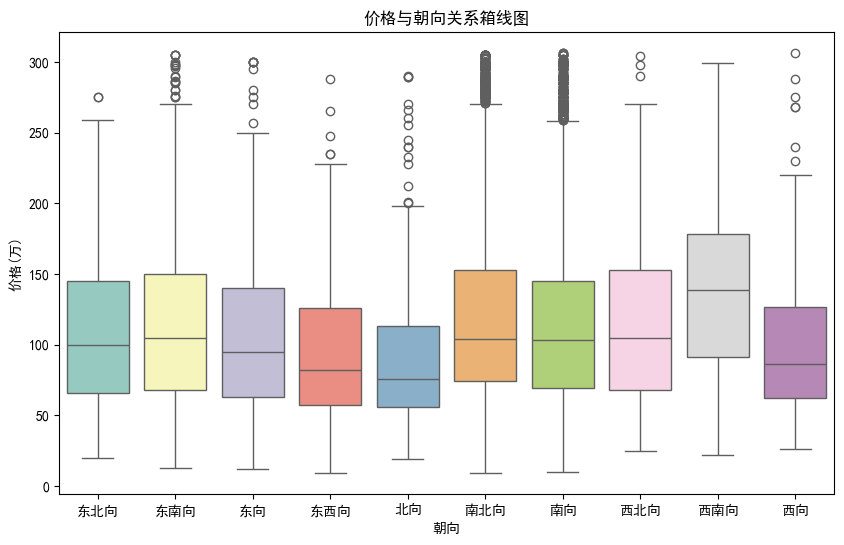

In [26]:
#价格与朝向关系箱线图
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='toward',y='price',palette='Set3')
plt.title('价格与朝向关系箱线图')
plt.xlabel('朝向')
plt.ylabel('价格(万)')
plt.show()
